<a href="https://colab.research.google.com/github/Vishnuvardhan172709/Aiml-/blob/main/assignment%205%20part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

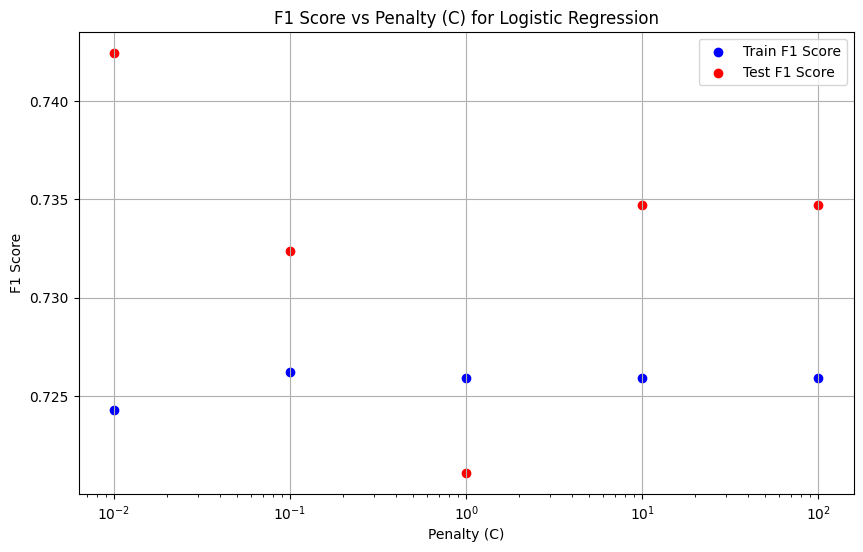

C values: [0.01, 0.1, 1, 10, 100]
Train F1 scores: [0.7242798353909465, 0.7262135922330097, 0.725897920604915, 0.725897920604915, 0.725897920604915]
Test F1 scores: [0.7424242424242424, 0.7323943661971831, 0.7210884353741497, 0.7346938775510204, 0.7346938775510204]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Fetch the Titanic dataset from the online source
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
response = requests.get(url)
titanic_data = StringIO(response.text)

# Load the dataset into a DataFrame
df = pd.read_csv(titanic_data)

# Step 1: Preprocess the Data

# Drop irrelevant columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Handle missing values - fill missing Age with median and drop rows with missing Embarked or Survived
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked', 'Survived'])

# Convert categorical columns to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features (X) and target (Y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']

# Step 2: Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply Logistic Regression Model

# Create logistic regression model with different penalties (C values)
C_values = [0.01, 0.1, 1, 10, 100]
f1_scores_train = []
f1_scores_test = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_scaled, Y_train)

    # Predict on training and test data
    Y_train_pred = model.predict(X_train_scaled)
    Y_test_pred = model.predict(X_test_scaled)

    # Calculate the F1 score for both training and test data
    f1_train = f1_score(Y_train, Y_train_pred)
    f1_test = f1_score(Y_test, Y_test_pred)

    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Step 4: Plot F1 Scores as a Function of Penalty (C)

plt.figure(figsize=(10, 6))
plt.scatter(C_values, f1_scores_train, color='blue', label='Train F1 Score')
plt.scatter(C_values, f1_scores_test, color='red', label='Test F1 Score')
plt.xscale('log')  # Use a logarithmic scale for the penalty
plt.xlabel('Penalty (C)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty (C) for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, print the results for reference
print(f"C values: {C_values}")
print(f"Train F1 scores: {f1_scores_train}")
print(f"Test F1 scores: {f1_scores_test}")
